# Keşifçi Veri Analizi Projesi 

## Gerekli Paketleri Yükleyelim

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import plotly.express as px

- Not: Değişkenlerin açıklamaları ve verimizin hikayesi README kısmında verilmiştir.

## Veriye İlk Bakışı Yapalım

In [5]:
df = pd.read_csv("C:/Users/asus/Desktop/student-mat.csv")


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

- Değişkenlerin type değerlerini inceledirk. Sayısal ve kategorik bir sürü değerimiz var.

In [6]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


- Verimizin ilk 10 satırına kısaca göz gezdirdik.

In [7]:
df.shape

(395, 33)

- Verimiz 395 satır ve 33 sütundan oluşmaktadır.

In [8]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


- describe() komutu ile değişkenlerimizin ortalama, standart sapma gibi değerlerini inceledik.

## Eksik Değer Kontrolü Yapalım

In [9]:
df.isna().sum()


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

- Verimizde eksik değer yok.

## Aykırı Değer Kontrolü Yapalım;

In [7]:
q1 = df["G3"].quantile(0.25)

- Birinci çeyrek.

In [8]:
q3 = df["G3"].quantile(0.75)

- Üçüncü çeyrek.

In [10]:
iqr = q3 - q1

- Çeyrekler arası açıklık.

In [11]:
altsınır = q1 - 1.5*iqr

In [12]:
üstsınır = q3 + 1.5*iqr


In [13]:
print("Alt Sınır:", altsınır)
print("Üst Sınır:", üstsınır)

Alt Sınır: -1.0
Üst Sınır: 23.0


In [14]:
aykırılar = df[(df["G3"] < altsınır) | (df["G3"] > üstsınır)]

In [15]:
print("Aykırı değer sayısı:", aykırılar.shape[0])


Aykırı değer sayısı: 0


- Öğrencilerin final notlarında aykırı değer olmadığını görmüş olduk.

## Tek Değişkenli Analizler

- Final notları (G3) dağılımını histogram grafiği ile incelersek;


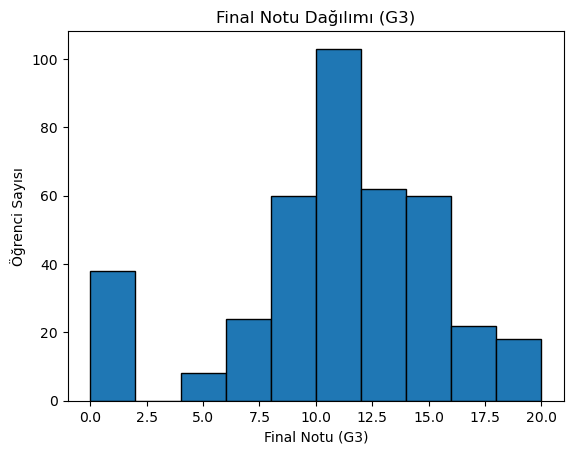

In [10]:
plt.hist(df["G3"],bins = 10, edgecolor = "black")
plt.title("Final Notu Dağılımı (G3)")
plt.xlabel("Final Notu (G3)")
plt.ylabel("Öğrenci Sayısı")
plt.show()

- Bu histogram grafiğinden öğrencilerin final notlarının büyük çoğunlukla ortalama notlar
olduğunu görebiliyoruz. 0.0 ve 2.5 final notu aralığında da yaklaşık 38 öğrenci bulunuyor.
10.0 ve 12.5 aralığında bulunan yaklaşık 105 öğrenci var.

- Şimdi çeşitli veriler ile bu final notlarını inceleyelim;

In [11]:
df["G3"].describe()


count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

- Bu verilerden ortalama final notlarının 10.41, standart sapmasının ise 4.58 olduğunun
görüyoruz. En düşük notun 0, en yüksek notun ise 20 olduğunu görebiliyoruz.

- Şimdi öğrencilerin haftalık çalışma süresi (studytime) bilgilerini bar 
grafiğinde gösterelim.

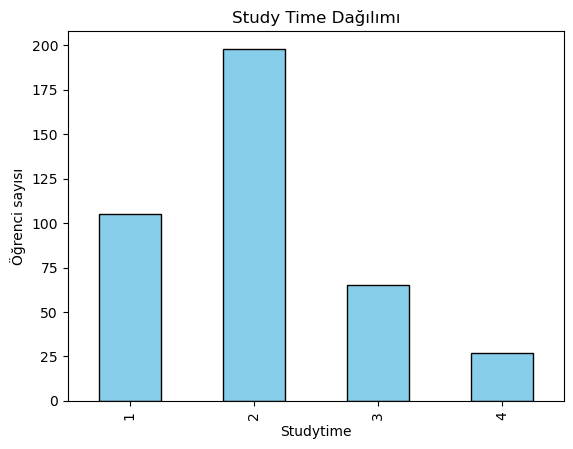

In [12]:
df["studytime"].value_counts().sort_index().plot(
    kind="bar", color="skyblue", edgecolor="black")
plt.title("Study Time Dağılımı")
plt.xlabel("Studytime")
plt.ylabel("Öğrenci sayısı")
plt.show()

- Bu grafikten gördüğümüz kadarıyla 2 değeri en yüksek, 4 değeri en küçük çıkmış.
Yani haftada 2-5 saat ders çalışan öğrencilerin sayısı en fazla, 10 saatten
fazla ders çalışanların sayısı ise en az.

In [13]:
df["studytime"].value_counts()

studytime
2    198
1    105
3     65
4     27
Name: count, dtype: int64

- 198 öğrenci 2-5 saat arası çalışıyor, 105 
öğrenci 2 saatten az, 65 öğrenci 5-10 saat, 27 öğrenci ise 10 saatten
fazla çalışıyor.
Ayrıca bu grafiğin sağa çarpık bir grafik olduğunu ve az ders çalışanların 
çok ders çalışanlara göre fazla sayıda olduğunu görebiliriz.

- Öğrencilerin ne kadarının anaokuluna gittiğini pasta grafiği ile gösterelim;


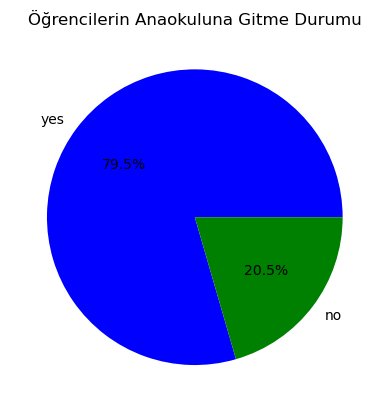

In [16]:
df["nursery"].value_counts().plot(kind = "pie",autopct="%.1f%%",
                                  colors = ["blue","green"])
plt.title("Öğrencilerin Anaokuluna Gitme Durumu")
plt.ylabel("")
plt.show()

- Burada öğrencilerin %79.5'inin anaokuluna gittiğini ve %20.5'inin ise
anaokuluna gitmedğini görüyoruz. Aradaki fark gerçekten fazla.

- Öğrencilerin evinde internet erişimi var mı? Sorusunu yine pasta grafiği
ile gösterelim.

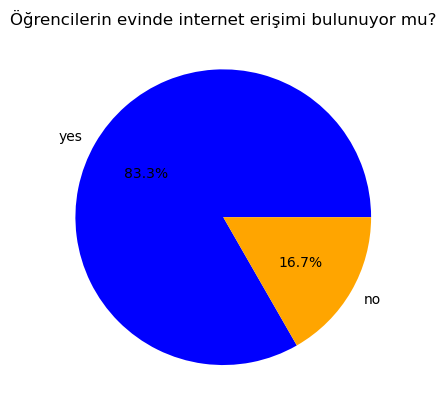

In [18]:
df["internet"].value_counts().plot(kind = "pie", autopct="%.1f%%",
                                   colors = ["blue","orange"])
plt.title("Öğrencilerin evinde internet erişimi bulunuyor mu?")
plt.ylabel("")
plt.show()

- Buradan %83.3'lük bir kısmın internete erişimi olduğunu ve %16.7'lik bir
kısmın ise internete erişiminin olmadğını görüyoruz.

- Öğrencilerin ev ile okulu arasındaki seyahat süresini gösteren bir bar-chart
oluşturalım.

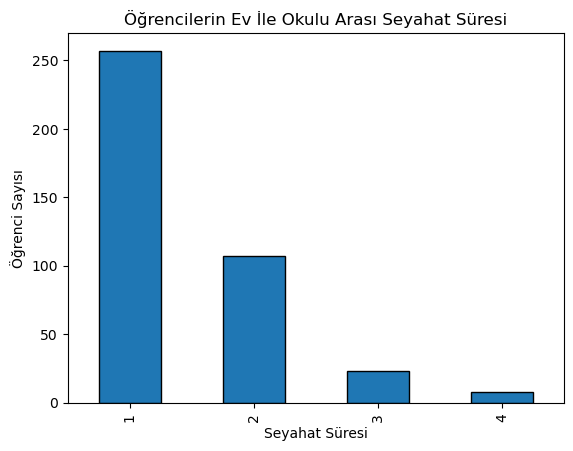

In [20]:
df["traveltime"].value_counts().plot(kind = "bar", edgecolor = "black")
plt.title("Öğrencilerin Ev İle Okulu Arası Seyahat Süresi")
plt.xlabel("Seyahat Süresi")
plt.ylabel("Öğrenci Sayısı")
plt.show()

- Grafikten görüldüğü üzere okulu ile evi arası yürüyüş süresi 15 dakikadan az
olanlar en fazla, ardından 15-30 dakika, 30 dakika - 1 saat ve onun ise 
ardından 1 saatten fazla yürüyüşe sahip öğrenciler geliyor.

- Değerlerine bakacak olursak;


In [21]:
df["traveltime"].value_counts()


traveltime
1    257
2    107
3     23
4      8
Name: count, dtype: int64

- Sadece 8 kişinin yolu 1 saatten fazla ve 257 kişinin yolu 15 dakikadan az.


- Öğrencileri aile ilişkilerinin kalitesini yine bar-chart ile gösterelim;

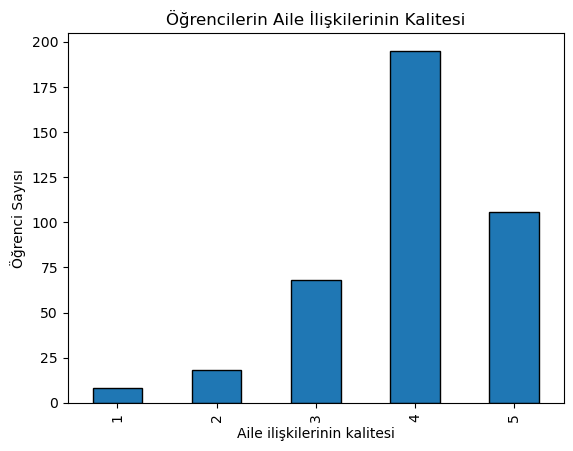

In [22]:
df["famrel"].value_counts().sort_index().plot(kind = "bar",
                                              edgecolor = "black")
plt.title("Öğrencilerin Aile İlişkilerinin Kalitesi")
plt.xlabel("Aile ilişkilerinin kalitesi")
plt.ylabel("Öğrenci Sayısı")
plt.show()

- Sola çarpık bir grafik ile karşılaştık. Çoğunlukla aile ilişkileri iyi ve 
çok iyi çıkmış. 

- Öğrencilerin okul sonrası kalan boş zamanını gösteren bir bar-chart yapalım;

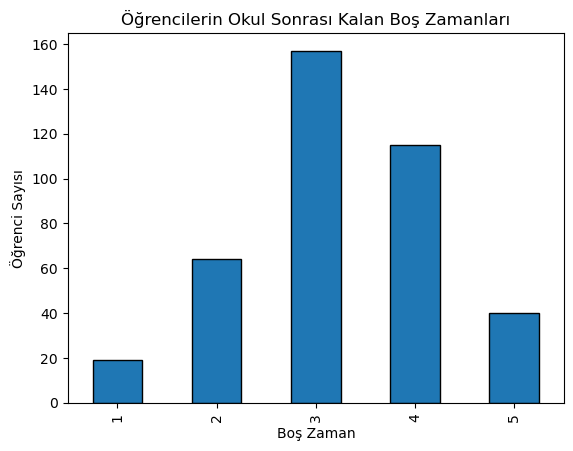

In [23]:
df["freetime"].value_counts().sort_index().plot(kind = "bar",
                                                edgecolor = "black")
plt.title("Öğrencilerin Okul Sonrası Kalan Boş Zamanları")
plt.xlabel("Boş Zaman")
plt.ylabel("Öğrenci Sayısı")
plt.show()

- Buradan görüyoruz ki öğrencilerin büyük bir çoğunluğunun ortalama bir boş 
zamanı oluyormuş. Çok az veya çok fazla boş zamanı olan fazlasıyla az kişi
bulunuyor. 

- Yeterince değişkeni ayrı ayrı inceledik artık iki değişkenli analizlere geçebiliriz.

## İki Değişkenli Analizler

- Öğrencilerin final notları ile romantik bir ilişkisi olması arasında 
oluşan ilişkiyi box-plot ile gösterelim.

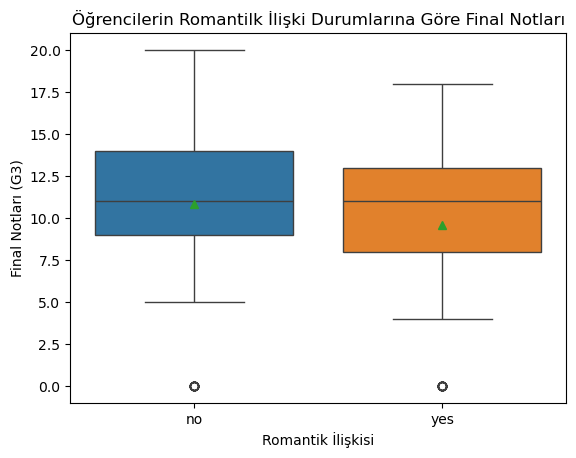

In [30]:
sns.boxplot(x = "romantic", y = "G3", data = df,
            showmeans = True, hue = "romantic", legend = False)
plt.title("Öğrencilerin Romantilk İlişki Durumlarına Göre Final Notları")
plt.xlabel("Romantik İlişkisi")
plt.ylabel("Final Notları (G3)")
plt.show()

- Bu grafikten romantik ilişkisi olmayan öğrencilerin notlarının romantik ilişkisi olan öğrencilere göre belli miktarlarda daha yüksek
çıktğını görebiliriz.

In [31]:
df.groupby("romantic")["G3"].describe()


,count,mean,std,min,25%,50%,75%,max
romantic,,,,,,,,
no,263.0,10.836502,4.385946,0.0,9.0,11.0,14.0,20.0
yes,132.0,9.575758,4.856916,0.0,8.0,11.0,13.0,18.0


- Buradan ise romantik ilişkisi olmayan öğrencilerin final notlarının 
ortalaması 10.8 iken romantik ilişkisi olan öğrencilerin final notu 
ortalaması 9.57 çıkmıştır. Yani kısaca romantik ilişkisi olmayan 
öğrencilerin ortalama olarak daha yüksek notlar aldığını söyleyebiliriz.

- Öğrencilerin haftalık çalışma süresiyle final notları arasındak ilişkiyi
incelemek için box plot yapalım.


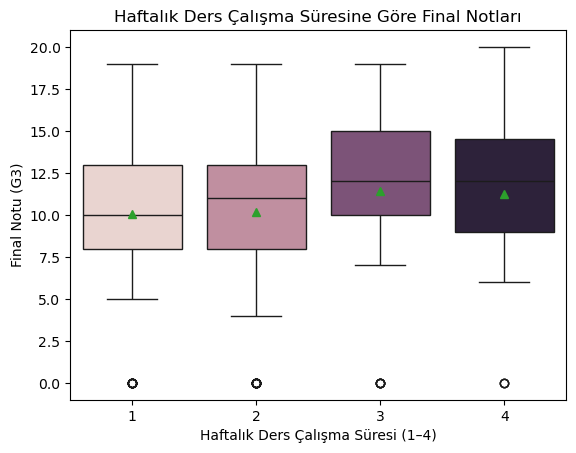

In [34]:
sns.boxplot(x = df["studytime"], y = df["G3"], data = df,
            showmeans = True, hue= "studytime", legend = False)
plt.title("Haftalık Ders Çalışma Süresine Göre Final Notları")
plt.xlabel("Haftalık Ders Çalışma Süresi (1–4)")
plt.ylabel("Final Notu (G3)")
plt.show()

- Bu grafikte haftada 5-10 saat arası çalışan öğrencilerin final notları
ve ortalaması en yüksek çıktı. Tabi bu 10 saatten fazla çalışmanın kötü olduğunu göstermiyor fakat grafik bazı öğrenciler için bunun biraz gereksiz zaman kaybı olduğunu göstermiş.

In [36]:
df.groupby("studytime")["G3"].describe()


,count,mean,std,min,25%,50%,75%,max
studytime,,,,,,,,
1,105.0,10.047619,4.956311,0.0,8.0,10.0,13.0,19.0
2,198.0,10.171717,4.217537,0.0,8.0,11.0,13.0,19.0
3,65.0,11.400000,4.639504,0.0,10.0,12.0,15.0,19.0
4,27.0,11.259259,5.281263,0.0,9.0,12.0,14.5,20.0


- Buradan değerleri incelediğimizde haftada 2 saatten az çalışan öğrenciler
105 kişi, 2-5 saat çalışan öğrenciler 198 kişi. Final notları ortalaması 
neredeyse aynı çıkmış. Bu değerlerde de gördüğümüz gibi 5-10 saat arası çalışan
öğrencilerin final notları ortalaması biraz da olsa haftada 10 saatten fazla
çalışan öğrencilerden daha yüksek çıkmış hem de daha fazla öğrenciye 
sahip olmasına rağmen. Yani aslında haftada 5-10 saat arası ders çalışmanın daha verimli olduğunu görebiliyoruz.

- Öğrencilerin okullarına göre final notlarını yine box-plot ile kıyaslayalım;


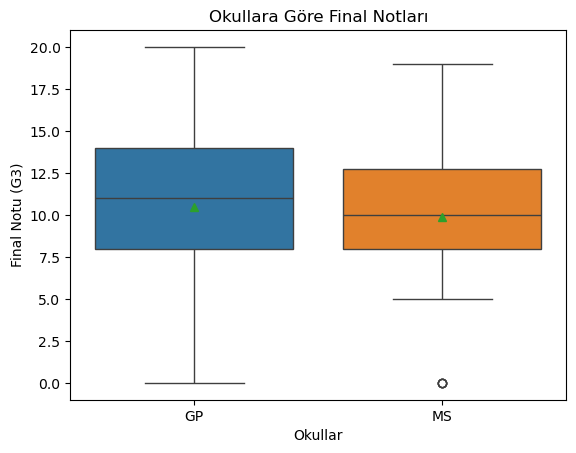

In [39]:
sns.boxplot(x = df["school"], y = df["G3"], data = df, hue = "school",
            showmeans = True, legend = False)
plt.title("Okullara Göre Final Notları")
plt.xlabel("Okullar")
plt.ylabel("Final Notu (G3)")
plt.show()

In [40]:
df.groupby("school")["G3"].describe()


,count,mean,std,min,25%,50%,75%,max
school,,,,,,,,
GP,349.0,10.489971,4.625397,0.0,8.0,11.0,14.00,20.0
MS,46.0,9.847826,4.237229,0.0,8.0,10.0,12.75,19.0


- GP okulunda okuyan 349 öğrenci, MS okulunda okuyan ise 46 öğrenci var.
GP okulunda okuyan öğrencilerin final notları ortalaması 10.48, MS okulunda
ise bu 9.84. Fakat grafikten gördüğümüz üzere final notu fazla düşük olan 
öğrenci sayısı GP okulunda daha fazla.

In [41]:
df.loc[(df["G3"] < 10) & (df["school"] == "GP"), ["school","G3"]].count()


school    113
G3        113
dtype: int64

- Final notu 10'dan düşük olup GP okulunda okuyan kişi sayısı 113.


In [42]:
df.loc[(df["G3"] < 10) & (df["school"] == "MS"), ["school","G3"]].count()


school    17
G3        17
dtype: int64

- Final notu 10'dan düşük olup MS okulunda okuyan kişi sayısı ise 17.
Tabi iki okulun öğrenci sayısı farkı çok fazla olduğu için bu sayılar
pek anlam ifade etmez, yüzdelerine bakmak daha mantıklı olur.

In [43]:
a = df[df["school"] == "GP"] #GP okulunda okuyan öğrencilere a dedik
b = a[a["G3"] < 10] # a'da final notu 10'dan düşük olan öğrencilere b dedik
(len (b)/len(a))*100

32.37822349570201

- GP okulunda okuyan öğrencilere a dedik,
GP okulunda final notu 10'dan düşük olan öğrencilere b dedik.
Burada baktığımızda GP okulunda okuyup final notu 
10'dan düşük olan öğrencilerin yüzdesi %32.3.

- Aynı işlemi MS okulu için uygulayalım;


In [44]:
a = df[df["school"] == "MS"]
b = a[a["G3"] < 10]
(len (b)/len(a))*100 

36.95652173913043

- MS okulunda okuyup final notu 10'dan düşük olan
öğrencilerin yüzdesi %36.95 çıktı.
Yani bu oranlara bakacak olursak fazla düşük not alma konusunda MS okulundaki
öğrenciler daha önde.

- MS okulunun öğrenci sayısının azlığını
düşünecek olursak bu iki okul arasında direkt 
olarak kalite kıyaslaması yapamayız fakat GP okulunda öğrencilerin final
notları ortalamasının belli bir miktar daha yüksek çıktığını görebiliriz.

- Öğrencilerin okudukları okullar ile (school), üniversite okuma isteklerinin
(higher), grafikte gösterimini count-plot  ile yapalım;

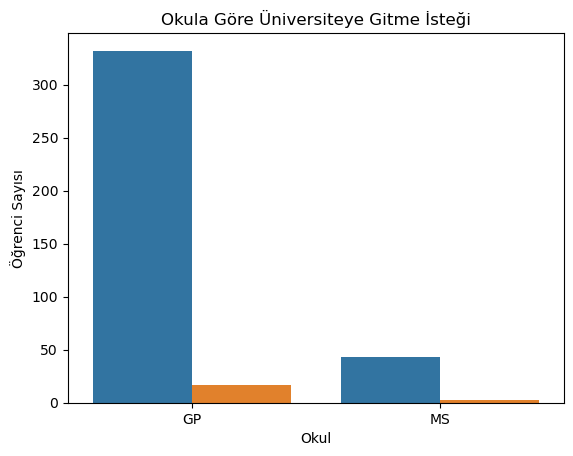

In [46]:
sns.countplot(x = "school", hue = "higher", data = df, legend = False)
plt.title("Okula Göre Üniversiteye Gitme İsteği")
plt.xlabel("Okul")
plt.ylabel("Öğrenci Sayısı")
plt.show()

- Bu grafikten GP okulunda çok daha fazla öğrencinin üniversiteye gitme 
isteği olduğunu görüyoruz fakat önceki yaptığımız grafikte de görüldüğü 
üzere GP okulunda çok daha fazla öğrenci var. Burada yüzde ile kıyaslama
yapmak daha mantıklı.

In [50]:
df.loc[(df["school"] == "GP") &
       (df["higher"] == "yes"),["school","higher"]].value_counts()

school  higher
GP      yes       332
Name: count, dtype: int64

In [51]:
df.loc[(df["school"] == "GP") &
       (df["higher"] == "no"),["school","higher"]].value_counts()

school  higher
GP      no        17
Name: count, dtype: int64

- Burada GP okulunda 332 kişinin üniversiteye gitme isteğinin olduğunu 17 kişi-
nin ise isteğinin olmadığını görüyoruz.
Birbirine oranlarsak
332/17. Üniye gitme isteği olanların olmayanlara oranı 19.5 çıktı.


- Şimdi MS okulu için bu orana bakalım;

In [52]:
df.loc[(df["school"] == "MS") &
       (df["higher"] == "yes"),["school","higher"]].value_counts()

school  higher
MS      yes       43
Name: count, dtype: int64

In [53]:
df.loc[(df["school"] == "MS") &
       (df["higher"] == "no"),["school","higher"]].value_counts()

school  higher
MS      no        3
Name: count, dtype: int64

- Burada ise MS okuluna giden öğrencilerden 43 kişinin üniye gitme isteği 
olduğunu 3 kişinin ise gitme isteği olmadığını görüyoruz. Bunları da 
birbirine oranlarsak;
43/3. Üniye gitme isteği olanların olmayanlara oranı 14.33 çıktı.

- Yani bu yorumlardan GP üniversitesine gidenlerin sayısının hem çok daha fazla
hem de üniversiteye gitme isteği oranında da MS üniversitesinden önde 
olduğunu görüyoruz.

- Öğrencilerin cinsiyetlerine (sex) göre alkol tüketimlerini (Walc)
count-plot ile inceleyelim;


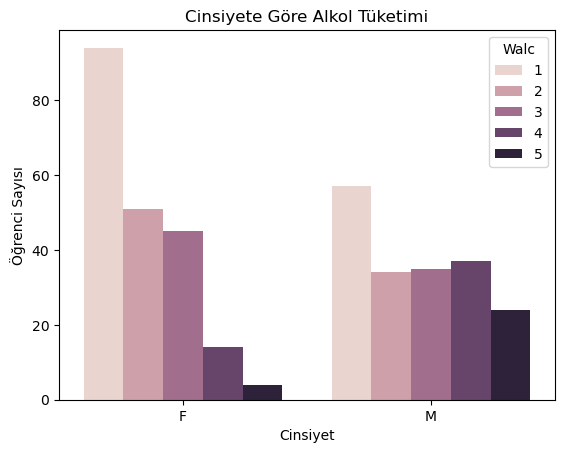

In [55]:
sns.countplot(x = "sex", hue = "Walc", data = df, legend = True)
plt.title("Cinsiyete Göre Alkol Tüketimi")
plt.xlabel("Cinsiyet")
plt.ylabel("Öğrenci Sayısı")
plt.show()

- Sadece grafikten incelediğimizde bile en yüksek değerde (5) alkol tüketen
erkeklerin kadınlara göre çok daha fazla olduğunu görüyoruz. Aynı şekilde
(4) değeri için de geçerli. Sayısal olarak da incelersek;

In [56]:
df["sex"].value_counts()

sex
F    208
M    187
Name: count, dtype: int64

- Verimizde 208 kadın, 187 erkek bulunuyor.

In [57]:
df.groupby("sex")["Walc"].value_counts().sort_index()


sex  Walc
F    1       94
     2       51
     3       45
     4       14
     5        4
M    1       57
     2       34
     3       35
     4       37
     5       24
Name: count, dtype: int64

- Erkeklerde çok yüksek oranda (5) ve yüksek oranda (4) alkol içen toplam 
61 kişi bulunmakta, kadınlarda ise bu sayı 18. 

- Oranlara da bakacak olursak;
61/187 * 100. Erkeklerin %32.6'sı yüksek oranda alkol tüketiyor.
18/208 * 100. Kadınların %8.65'i yüksek oranda alkol tüketiyor.

## Korelasyon Matrisi İle Son Bir İnceleme Yapalım

In [58]:
corr = df.select_dtypes(include=["number"]).corr()

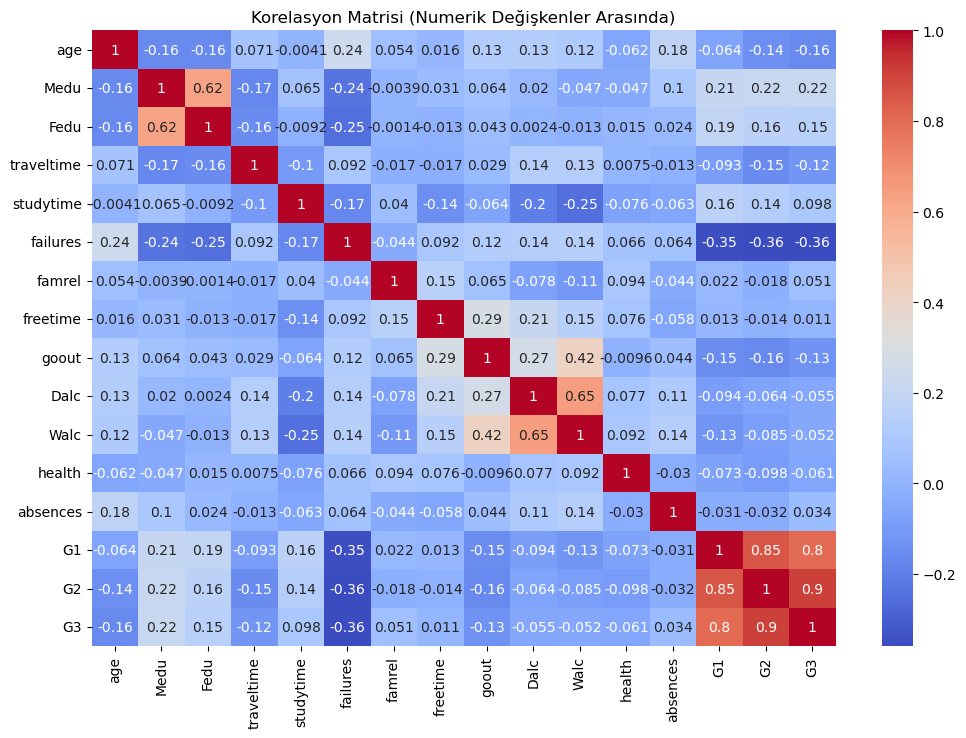

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi (Numerik Değişkenler Arasında)")
plt.show()

- Bu matrisi inceleyelim;


- Geçmiş dönemlerdeki başarısız ders sayısı (failures) ile alınan notlar
arasında orta negatif ilişki görüyoruz(~-0.35). Yani Geçmiş dönemdeki
başarısız ders sayısı fazla olanlar genellikle daha düşük notlar almış.

- Dalc ve Walc değerleri arasında da orta üst pozitif ilişki görmekteyiz.
(~0.65). Bu da haftaiçi alkol alanların hafta sonu da çoğunlukla aldığını
gösteriyor.

- Fedu ve Medu değerleri arasında da orta üst pozitif ilişki var.(~0.62).
Bu da demek oluyor ki öğrencinin annesinin eğitim düzeyi yüksekse babasının
da genellikle yüksek olur. Tam tersi de geçerlidir.

- Ayrıca Fedu ve Medu değerleri ile failures değeri arasında hafif negatif 
ilişki gözüküyor (~-0.25). Bu da demek oluyor ki öğrencilerin
anne ve babasının eğitim düzeyi arttıkça geçmiş dönemlerde başarısız ders 
sayıları belli miktar azalıyor.

- Arkadaşlarla dışarı çıkma (goout) değeri ile hafta sonu alkol tüketme 
değeri arasında orta pozitif ilişki bulunuyor (~0.42). 

- Dalc ve Walc değerleri ile haftalık ders çalışma süresi (studytime) arasında hafif negatif ilişki
(~-0.25) olduğunu görüyoruz. Daha çok alkol tüketenlerin daha az ders çalıştığını söyleyebiliriz.

- Fedu ve Medu değerleri ile final notları(G3) arasında hafif pozitif ilişki(~0.22, ~0.15) olduğunu görüyoruz.
Yani anne baba eğitim düzeyi arttıkça öğrencilerin final notlarının da belli miktar arttığını anlayabiliriz.

- G1 ve G2 notları yüksek olanların da final notları(G3)'nın yüksek
olduğunu görüyoruz. (çok büyük çoğunlukla).

- Bunlar gibi daha fazla yorum yapılabilir fakat en göze çarpan ilişkiler bunlardır.

 Böylelikle çeşitli grafikler ile bir çok değişkeni incelemiş analiz etmiş ve yorumda bulunmuş olduk.